# Part 1 - EDA and data engineering

In [2]:
#### Importing Libraries ####

import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

#dataset = pd.read_csv('./datasets/Mobileusebasedata.csv')
dataset = pd.read_csv('mobileusebasedata.csv')

In [3]:
dataset.shape

(50000, 12)

In [4]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [6]:
#### EDA ####


dataset.head(10) # Viewing the Data
dataset.describe() # Distribution of Numerical Variables

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# First set of Feature cleaning
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

### Plotting dataset
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


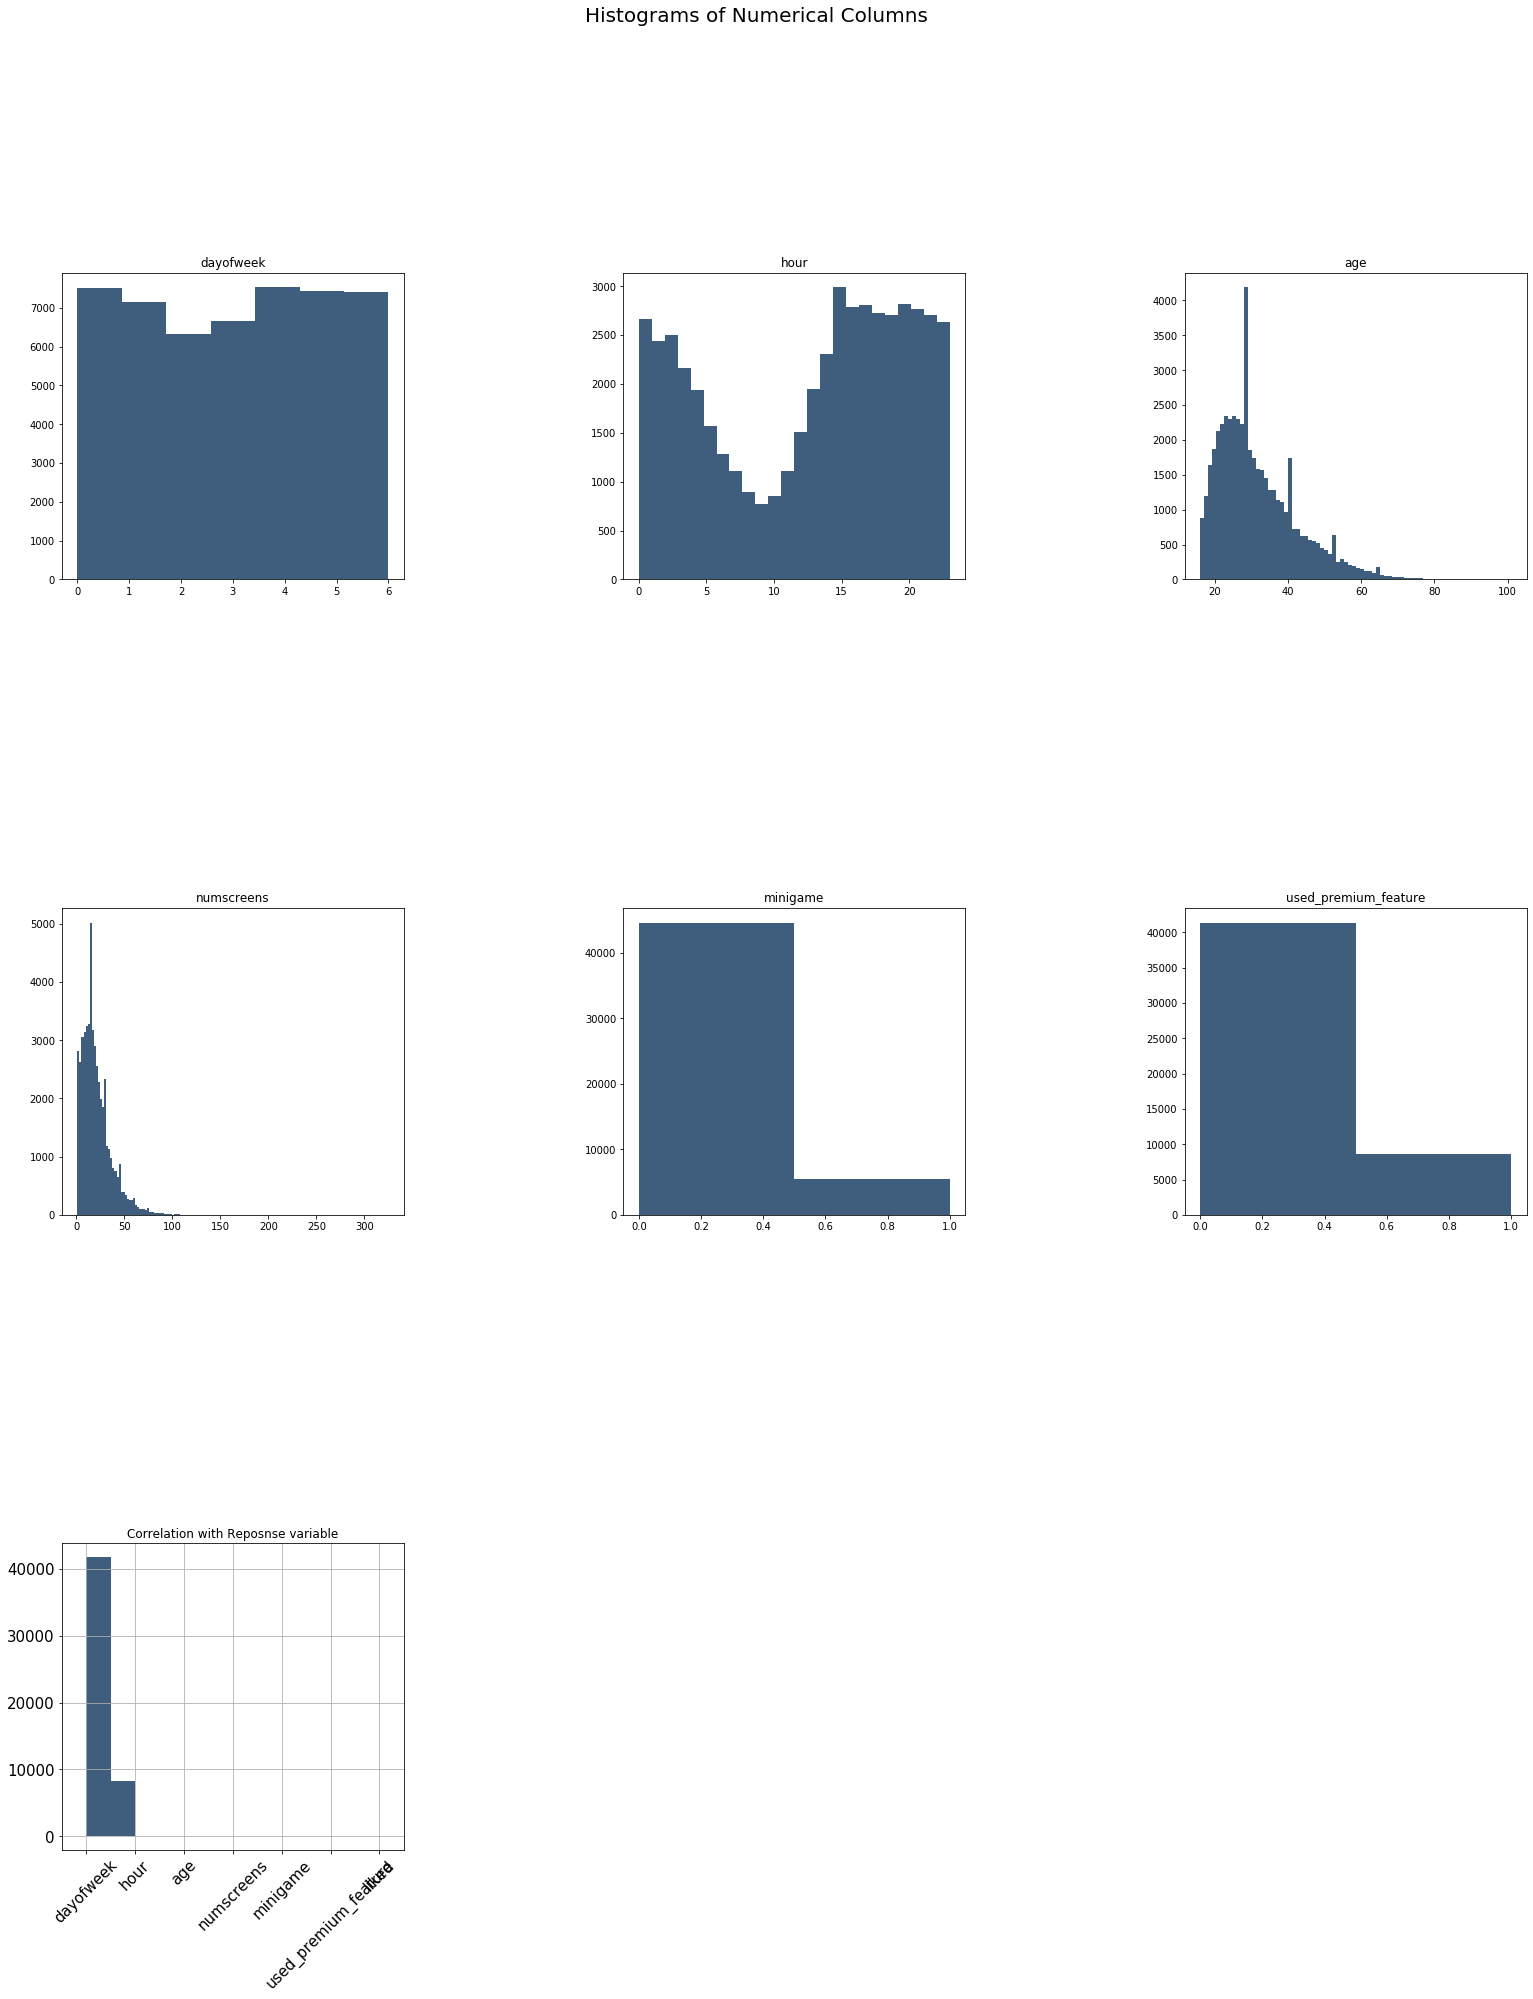

In [8]:
## Histograms - Part of question 1
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    #f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('app_data_hist.jpg')

## Correlation with Response Variable
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(25,30),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

# Questions under Part 1
EDA and Feature engineering
1.
Perform a EDA explanation for the histograms and Corelation matrix in under 10 lines. What can you conclude from them? 4 marks

# EDA Explanation - Perform a EDA explanation for the histograms

Histogram shows the frequency distribution. From the below histogram of 'Age' we can understand 20-30 age group has most number
of frequency in our data. After 30, number of frequency decreases rapidly.
'Numscreen' shows right skewed distribution where highest number of numscreen lies between in the range of 10-20,
then it decreses

(array([    0.,  3732., 10860., 11050.,  8195.,  5786.,  3813.,  3127.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50]),
 <a list of 8 Patch objects>)

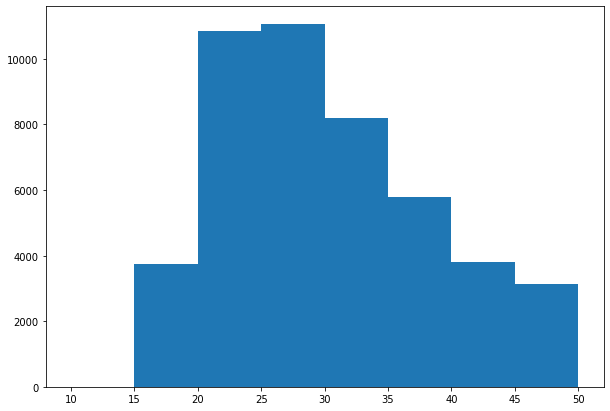

In [9]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dataset2['age'], bins =  [10,15,20,25,30,35,40,45,50]
)

(array([8168., 8008., 6288., 4702., 3233., 2338., 1698., 1175.,  804.,
         616.,  411.,  275.,  269.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 13 Patch objects>)

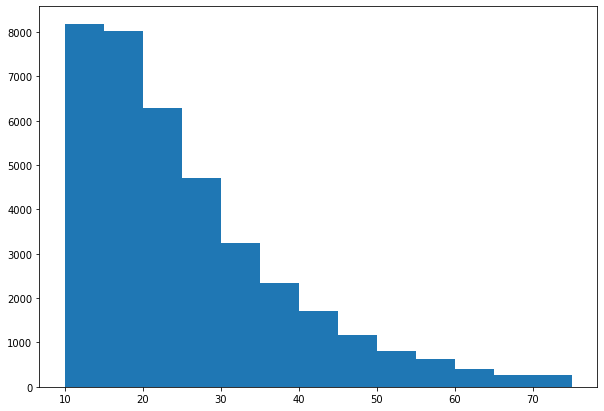

In [10]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dataset2['numscreens'], bins =  [10,15,20,25,30,35,40,45,50,55,60,65,70,75]
)

In [11]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

In [12]:
# Compute the correlation matrix
corr = dataset2.corr()

In [13]:
print(corr)

                      dayofweek      hour       age  numscreens  minigame  \
dayofweek              1.000000  0.013249 -0.012326    0.007925 -0.008631   
hour                   0.013249  1.000000  0.018859   -0.076756 -0.009120   
age                   -0.012326  0.018859  1.000000   -0.128739  0.019745   
numscreens             0.007925 -0.076756 -0.128739    1.000000  0.041154   
minigame              -0.008631 -0.009120  0.019745    0.041154  1.000000   
used_premium_feature   0.001439  0.022553  0.004301    0.061972  0.108780   
liked                 -0.005737 -0.001725 -0.002593   -0.007349 -0.012250   

                      used_premium_feature     liked  
dayofweek                         0.001439 -0.005737  
hour                              0.022553 -0.001725  
age                               0.004301 -0.002593  
numscreens                        0.061972 -0.007349  
minigame                          0.108780 -0.012250  
used_premium_feature              1.000000  0.001690 

# Explanation of Corelation matrix

A correlation matrix is simply a table which displays the correlation. It is best used in variables that demonstrate a linear relationship between each other
e.g. correlation between 'age' and 'numscreen' is -0.13 which means 'age' has a strong negative correlation with 'numscreen'.
if age increases numscreen decreases.Likewise 'minigame' and 'used_premius_feature' has strong positive correlation.

'Liked' variable is dependent varibale or taget variable.Correlation between 'age' and 'liked' is -0.0026 which means 'age' has a negative correlation.


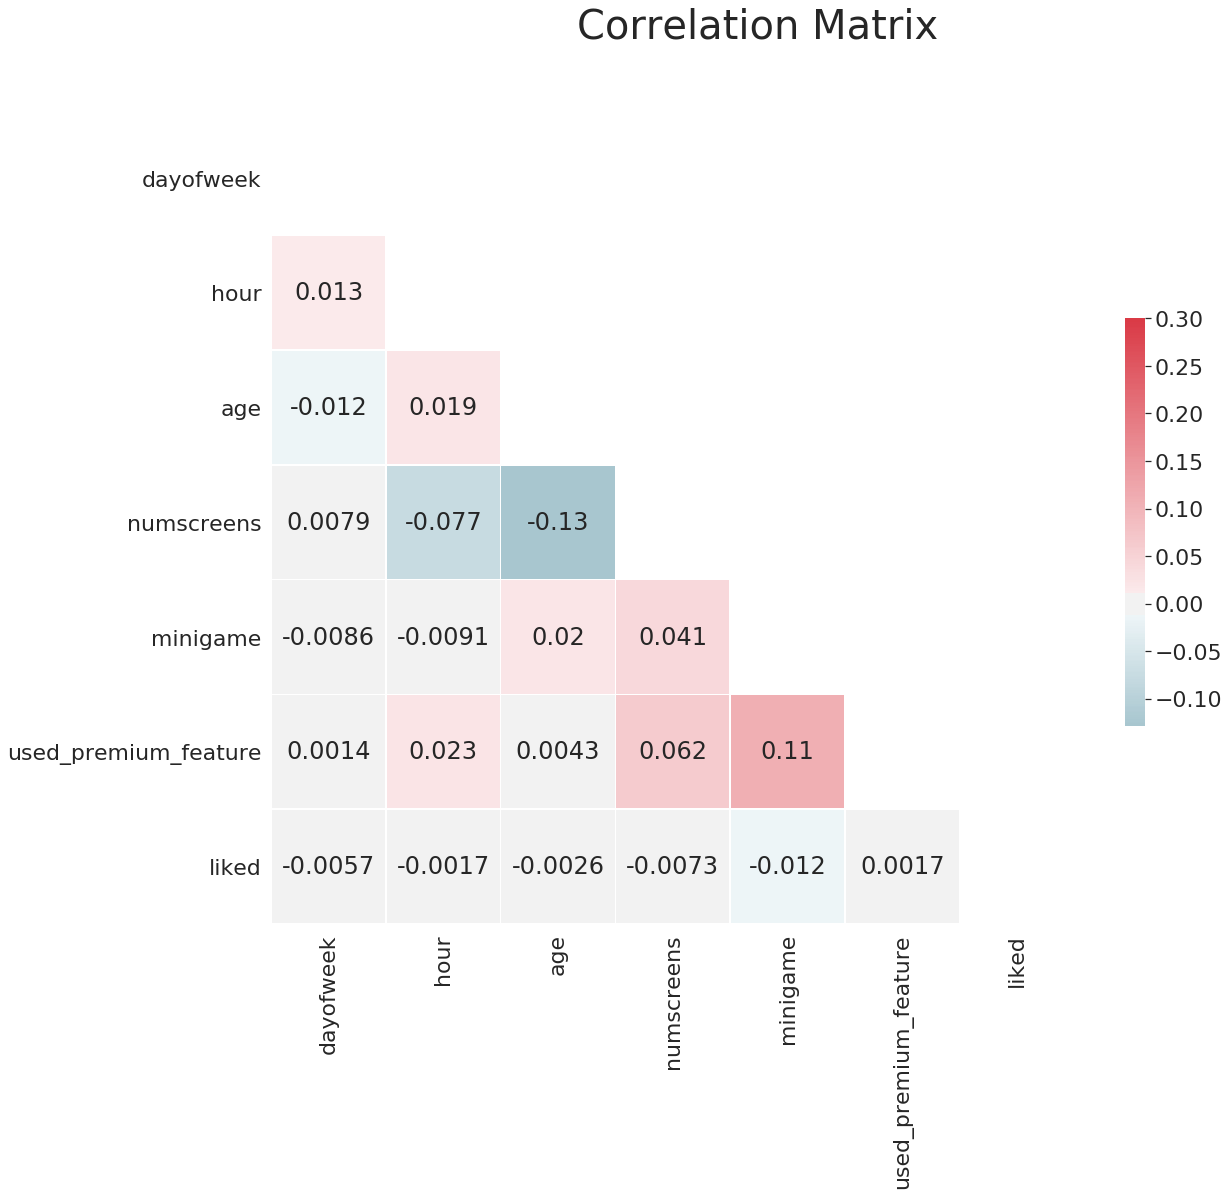

In [14]:
# Generate a mask for the upper triangle - Part of question 1
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# Questions under Part1 - Conclusion


From the frequency distribution or histogram, we can conclude that most data has the 'age' group of 20-30,'num_screen' of 10-20.
From 0 to 10 hours, frequency is decreasing and from 10 to 15, frequency is increasing for 'hour' variable.
'Minigame' has highest number of frequency in between 0-0.5. Same as 'used_premium_feature'

Correlation Matrix shows taget variable 'liked' has negative correlation with 'dayofweek','hour','age','numscreens','minigames' whereas 'used_premium_feature' shows positive correlation with 'liked'.

In [15]:
# Formatting Date Columns
dataset.dtypes
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

# Question under Part - 1
2. Do you think data scaling and categorical variables handling is needed in the dataset? Why or Why not? 3 marks

Why Data Scaling is important?
Yes Data Scaling is important. Scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.
if we don't scale the data, model will learn more from which has higher values and it will lead to overfitting.


Why Categorical variables handling is needed?
Machine learning models require all input and output variables to be numeric.This means that if data contains categorical data, we must encode it to numbers before we can fit and evaluate a model.

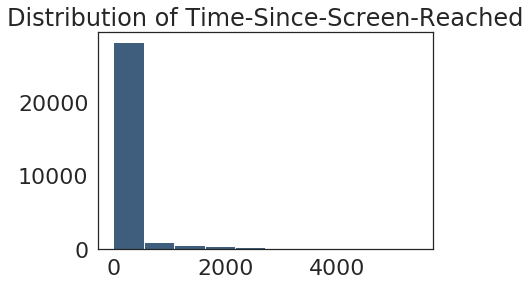

In [16]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

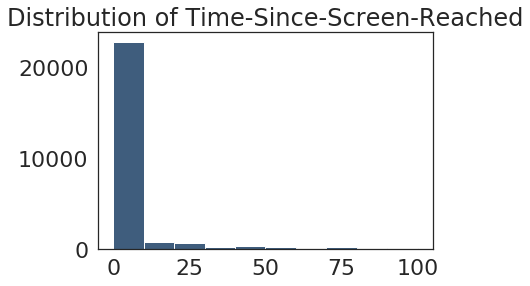

In [17]:

plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [18]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0 # Give two days or 48 hrs to enroll in BNPL feature else ignore user
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [19]:
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('most_used_screens.csv').top_screens.values
top_screens

# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [20]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [21]:
# Funnels - Funnel is a concept in app marketing that breaks down the user journey from noticing an app to becoming a loyal and valuable user.
# you can also think of it as a collection of screens used and opened by the user
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [22]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [23]:
#### Saving Results ####
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv('mobileusebasedata_engineered.csv', index = False)

In [24]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


# Part 2 - Making models

In [25]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

dataset = pd.read_csv('mobileusebasedata_engineered.csv')

In [26]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [27]:
# Splitting Independent and Response Variables
response = dataset["enrolled"] # This is label
dataset = dataset.drop(columns="enrolled") # Note the drop --> This are our features

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [28]:

# Removing Identifiers, we remove user column as it is of no significance for our classification
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

# Questions under Part 2
Making models
3. Code and compare results showing at least two classifier models from Logistic regression, GBM(Gradient boosting) or AdaBoo
st. Compare the accuracy results via a confusion matrix and
report. Which model would you recommend here? Why? 8 marks

In [29]:
# Model 1 classifier - Question 3
#Model 1 Classifier - AdaBoostClassifier
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


# Start of code
from sklearn.ensemble import RandomForestClassifier
classifier_ada = AdaBoostClassifier(random_state = 96, base_estimator= RandomForestClassifier(random_state=101),n_estimators=100, learning_rate =0.01)
# end of code

classifier_ada.fit(X_train, y_train)

# Predicting Test Set
y_pred_ada = classifier_ada.predict(X_test)

In [30]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm_ada = confusion_matrix(y_test, y_pred_ada)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada) # tp / (tp + fp)
recall_ada = recall_score(y_test, y_pred_ada) # tp / (tp + fn)

# start of code
F1_ada = 2 * (precision_ada * recall_ada) / (precision_ada + recall_ada)
# Fill the code in fi score
# end of code
print("Accuracy: ", accuracy_ada)
print("Precision: ", precision_ada)
print("Recall: ", recall_ada)
print("f1 score: ", F1_ada)


Accuracy:  0.7821
Precision:  0.7882155588173622
Recall:  0.7627840909090909
f1 score:  0.7752913272146025


Test Data Accuracy: 0.7821


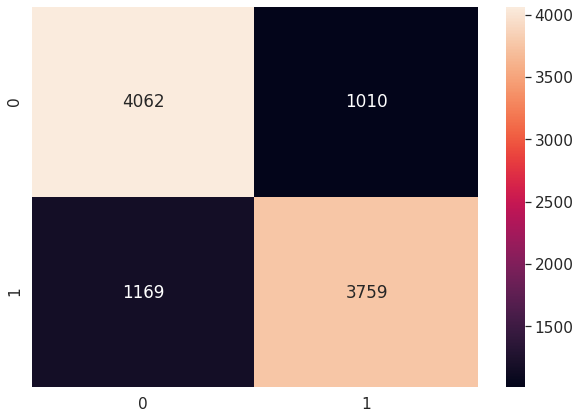

In [32]:
df_cm_ada = pd.DataFrame(cm_ada, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm_ada, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred_ada))

In [167]:
# Model 2 classifier - Logisticregression

In [33]:
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


# Start of code
from sklearn.ensemble import RandomForestClassifier
classifier_log = LogisticRegression()
# end of code

classifier_log.fit(X_train, y_train)

# Predicting Test Set
y_pred_log = classifier_log.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log) # tp / (tp + fp)
recall_log = recall_score(y_test, y_pred_log) # tp / (tp + fn)

# start of code
F1_log = 2 * (precision_log * recall_log) / (precision_log + recall_log)
# Fill the code in fi score
# end of code
print("Accuracy: ", accuracy_log)
print("Precision: ", precision_log)
print("Recall: ", recall_log)
print("f1 score: ", F1_log)


Accuracy:  0.7683
Precision:  0.7629405840886203
Recall:  0.7686688311688312
f1 score:  0.765793995754574


Test Data Accuracy: 0.7683


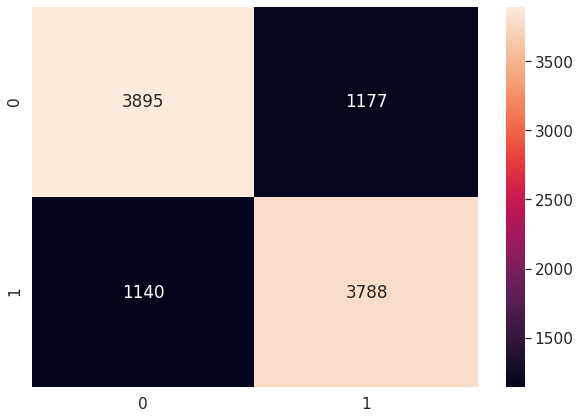

In [36]:
df_cm_log = pd.DataFrame(cm_log, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm_log, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred_log))

# Compare the accuracy results via a confusion matrix and
report. Which model would you recommend here? Why?


In [37]:
print("Adaboost Classifier")
print("Accuracy: ", accuracy_ada)
print("Precision: ", precision_ada)
print("Recall: ", recall_ada)
print("f1 score: ", F1_ada)


print("---------------------------------")
print("Logistic Regression")
print("Accuracy: ", accuracy_log)
print("Precision: ", precision_log)
print("Recall: ", recall_log)
print("f1 score: ", F1_log)



Adaboost Classifier
Accuracy:  0.7821
Precision:  0.7882155588173622
Recall:  0.7627840909090909
f1 score:  0.7752913272146025
---------------------------------
Logistic Regression
Accuracy:  0.7683
Precision:  0.7629405840886203
Recall:  0.7686688311688312
f1 score:  0.765793995754574


Adaboost classifier shows more accuracy, precision, so I will choose Adaboost classifier over logistic regression. In this problem statement precision score is more important(how many of the correctly predicted cases actually turned out to be positive).

Below code is taking longer time and not giving any output

In [ ]:
# Applying k-Fold Cross Validation
#Taking too much time to run and not giving the result
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

# 4. Create a Grid Search for both L1,L2 regularisation using C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
for one of the models you recommended. What is your conclusion? 5 marks

In [39]:
## Grid Search (Round 1) - Question 4 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#clf = RandomForestClassifier
# Select Regularization Method
#penalty = ['l1', 'l2']

from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.001,0.1,1,10,100,1000]}
grid_search = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')


In [41]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

Took 36.69 seconds


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.76899908290628, {'C': 10, 'penalty': 'l2'})

# Conclusion:
From the GRID search we are getting best value of C = 10 and Penalty = l2

In [49]:
## Grid Search (Round 2)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#clf = RandomForestClassifier
# Select Regularization Method
#penalty = ['l1', 'l2']

from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l2'],'C':[10]}
grid_search = GridSearchCV(clf, param_grid = grid_values,scoring = 'precision')


In [50]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [51]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

0.7597839579107017

In [55]:
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred_log
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [56]:
final_results.head(3)

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0


# Part C - Neural networks


# Questions under Part 3
Neural networks
5. Code and using Keras fit at least 3 types of Neural network using Keras Sequential model. Use at least 3 models from below
op tions. You can keep batch size as 15 and number of epochs to
100.Why you think your model improved or did not improve? 15 marks

In [ ]:
#note: epochs = 100 is taking longer time and not giving any output(showing some error due to low memory) so epochs =25 has been used

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [58]:
X_train.shape,y_train.shape

((40000, 48), (40000,))

In [64]:
# Question 5 - Model 1 (Adding hidden layer and Activation Function = "ReLu" and 'softmax', Optimizer = 'sgd')
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
model1 = Sequential()
init = RandomUniform(minval=0, maxval=1)
model1.add(Dense(100, input_dim=48, activation='relu', kernel_initializer=init))
model1.add(Dense(1, activation="softmax"))

In [65]:
model1.output_shape

(None, 1)

In [66]:
model1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']) # use of loss as binary_crossentrophy
model1.fit(X_train,y_train,batch_size=15,epochs=25)

Epoch 1/25
40000/40000 [==============================] - 7s 175us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 2/25
40000/40000 [==============================] - 7s 167us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 3/25
40000/40000 [==============================] - 7s 171us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 4/25
40000/40000 [==============================] - 7s 177us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 5/25
40000/40000 [==============================] - 6s 159us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 6/25
40000/40000 [==============================] - 7s 174us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 7/25
40000/40000 [==============================] - 7s 163us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 8/25
40000/40000 [==============================] - 6s 160us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 9/25
40000/40000 [==============================] - 6s 157us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 10/25
40000/40000 [=====================

In [68]:
model_loss, model_mae = model1.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 45us/step


In [69]:
score = model1.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/step


In [70]:
print(score)

[7.734413874053955, 0.4927999973297119]


In [72]:
# Question 5 - model 2 (Adding one more hidden layer and Activation Function = "ReLu" and 'softmax', Optimizer = 'sgd')
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
model2 = Sequential()
init = RandomUniform(minval=0, maxval=1)
model2.add(Dense(100, input_dim=48, activation='relu', kernel_initializer=init))
model2.add(Dense(50, input_dim=100, activation='relu', kernel_initializer=init))
model2.add(Dense(1, activation="softmax"))

In [73]:
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']) # use of loss as binary_crossentrophy
model2.fit(X_train,y_train,batch_size=15,epochs=25)

Epoch 1/25
40000/40000 [==============================] - 8s 206us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 2/25
40000/40000 [==============================] - 8s 206us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 3/25
40000/40000 [==============================] - 8s 195us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 4/25
40000/40000 [==============================] - 9s 221us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 5/25
40000/40000 [==============================] - 9s 222us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 6/25
40000/40000 [==============================] - 8s 211us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 7/25
40000/40000 [==============================] - 8s 208us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 8/25
40000/40000 [==============================] - 8s 194us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 9/25
40000/40000 [==============================] - 9s 214us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 10/25
40000/40000 [=====================

In [75]:
model_loss, model_mae = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/step


In [76]:
score = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/step


In [77]:
print(score)

[7.734413874053955, 0.4927999973297119]


In [79]:
# Question 5 - Model 3 (Activation Function = "ReLu" & 'softmax', Optimizer = 'RMSprop')
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
model3 = Sequential()
init = RandomUniform(minval=0, maxval=1)
model3.add(Dense(100, input_dim=48, activation='relu', kernel_initializer=init))
model3.add(Dense(50, input_dim=100, activation='relu', kernel_initializer=init))
model3.add(Dense(1, activation="softmax"))

In [80]:
model3.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy']) # use of loss as binary_crossentrophy
model3.fit(X_train,y_train,batch_size=15,epochs=25)

Epoch 1/25
40000/40000 [==============================] - 8s 211us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 2/25
40000/40000 [==============================] - 8s 210us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 3/25
40000/40000 [==============================] - 7s 174us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 4/25
40000/40000 [==============================] - 9s 213us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 5/25
40000/40000 [==============================] - 8s 205us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 6/25
40000/40000 [==============================] - 8s 195us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 7/25
40000/40000 [==============================] - 8s 199us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 8/25
40000/40000 [==============================] - 8s 206us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 9/25
40000/40000 [==============================] - 8s 197us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 10/25
40000/40000 [=====================

In [81]:
model_loss, model_mae = model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 47us/step


In [82]:
score = model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/step


In [83]:
print(score)

[7.734413874053955, 0.4927999973297119]


In [84]:
# Question 5 - model 4 (Activation Function = "ReLu" and 'softmax', Optimizer = 'Adam')
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
model4 = Sequential()
init = RandomUniform(minval=0, maxval=1)
model4.add(Dense(100, input_dim=48, activation='relu', kernel_initializer=init))
model4.add(Dense(50, input_dim=100, activation='relu', kernel_initializer=init))
model4.add(Dense(1, activation="softmax"))

In [85]:
model4.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy']) # use of loss as binary_crossentrophy
model4.fit(X_train,y_train,batch_size=15,epochs=25)

Epoch 1/25
40000/40000 [==============================] - 9s 223us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 2/25
40000/40000 [==============================] - 9s 221us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 3/25
40000/40000 [==============================] - 8s 207us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 4/25
40000/40000 [==============================] - 9s 217us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 5/25
40000/40000 [==============================] - 8s 211us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 6/25
40000/40000 [==============================] - 9s 231us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 7/25
40000/40000 [==============================] - 9s 225us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 8/25
40000/40000 [==============================] - 9s 230us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 9/25
40000/40000 [==============================] - 10s 243us/step - loss: 7.6965 - accuracy: 0.4981
Epoch 10/25
40000/40000 [====================

In [87]:
model_loss, model_mae = model4.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 48us/step


In [88]:
score = model4.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 34us/step


In [89]:
print(score)

[7.734413874053955, 0.4927999973297119]


In [ ]:
# Fit more models from here using RMPSprop, Adam and change the model layers 
# Create atleast 3 more models and try to get a much better accuracy score